In [1]:
import pandas as pd
import openpyxl

In [2]:
# importing functions we defined in our .py file
from codebook_florida import filter_month, clean_time_format, categorize_cleaned_time, activity_new, clean_injuries, clean_location

In [3]:
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTUWyxsOF7CjvSbhi-gP_Af2GU5bzlP8IkY245_pTruNS14uHqS6mTzIHOqUXW-pw/pub?output=csv"
df = pd.read_csv(path)
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# filtering out only observations from Florida USA
florida_variations = df["State"].str.contains("Florida", case=False, na=False)
unique_florida_types = df[florida_variations]["State"].unique()

florida_counts = df[florida_variations]["State"].value_counts()

print(unique_florida_types)
print(florida_counts)

['Florida' 'Franklin County, Florida' 'Florida Straits' 'Florida ']
State
Florida                     1178
Franklin County, Florida       1
Florida Straits                1
Florida                        1
Name: count, dtype: int64


In [5]:
florida_filtered_data = df[(df["State"].str.contains("Florida", case=False, na=False)) & (df["Country"] == "USA")]
florida_filtered_data

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
24,05 Nov-2023,2023.0,Unprovoked,USA,Florida,"Juno Beach, Palm Beach County",Swimming,Steven Reinhardt,M,66,...,NaN,"ABC, 11/15/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,12 Sep-2023,2023.0,Questionable,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Mark Summersett,M,38,...,NaN,"Daytona Beach News Journal, 9/13/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,11 Sep-2023,2023.0,Unprovoked,USA,Florida,"Satellite Beach, Brevard County",Surfing,Bill Eveland,M,NaN,...,NaN,"Fox 35,9/12/2-23",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,04 Sep 2023,2023.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,male,M,30s,...,NaN,"Click Orlando, 9/4/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,04 Sep 2023,2023.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Wading,female,F,37,...,NaN,"Click Orlando, 9/4/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,No date,0.0,Unprovoked,USA,Florida,"Key West, Monroe County",Kitesurfing,Paul Menta,M,NaN,...,NaN,Internet,ND-0097-PaulMenta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0097,ND.0097,86.0,NaN,NaN
6868,"No date, Before 1975",0.0,Provoked,USA,Florida,"Riviera Beach, Palm Beach County",Skin diving. Grabbed shark's tail; shark turne...,Carl Bruster,M,19,...,"Nurse shark, 2.1 m [7']","R. Skocik, p.176",ND-0087-Carl-Bruster.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0087,ND.0087,77.0,NaN,NaN
6875,"No date, Before 1902",0.0,Unprovoked,USA,Florida,"Mosquito Inlet (Ponce Inlet), Volusia County",Canoeing,male,M,NaN,...,NaN,"W.H. Gregg, p.19; L. Schultz & M. Malin, ...",ND-0078-canoeist-mail-carrier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0078,ND.0078,70.0,NaN,NaN
6891,Before 1958,0.0,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,NaN,...,NaN,"V.M. Coppleson (1956), p.255; R.F. Hutton",ND-0056-HortonChase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0056,ND.0056,54.0,NaN,NaN


In [6]:
florida_filtered_data.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [7]:
# dpropping unnecessary columns
florida_filtered_data = florida_filtered_data.drop(["Unnamed: 11", "Source", "pdf", "href formula", "href", "Case Number", 
                                                    "Case Number.1", "original order", "Unnamed: 21", "Unnamed: 22"], axis=1)

In [8]:
florida_filtered_data.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Time', 'Species '],
      dtype='object')

In [9]:
# making all observations from Florida USA look standardized 
florida_filtered_data["State"] = florida_filtered_data["State"].replace(r'.*Florida.*', 'Florida', regex=True)

In [10]:
florida_filtered_data["State"].value_counts()

State
Florida    1180
Name: count, dtype: int64

In [11]:
florida_filtered_data

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species
24,05 Nov-2023,2023.0,Unprovoked,USA,Florida,"Juno Beach, Palm Beach County",Swimming,Steven Reinhardt,M,66,Lacerations to right forearm,10h30,NaN
40,12 Sep-2023,2023.0,Questionable,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Mark Summersett,M,38,Llacerations to face and chin,07h50,NaN
41,11 Sep-2023,2023.0,Unprovoked,USA,Florida,"Satellite Beach, Brevard County",Surfing,Bill Eveland,M,NaN,Bite to lower back,NaN,NaN
44,04 Sep 2023,2023.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,male,M,30s,Left hand bitten,NaN,NaN
45,04 Sep 2023,2023.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Wading,female,F,37,Right foot bitten,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,No date,0.0,Unprovoked,USA,Florida,"Key West, Monroe County",Kitesurfing,Paul Menta,M,NaN,Hand bitten,NaN,NaN
6868,"No date, Before 1975",0.0,Provoked,USA,Florida,"Riviera Beach, Palm Beach County",Skin diving. Grabbed shark's tail; shark turne...,Carl Bruster,M,19,"Ankle punctured & lacerated, hands abraded PRO...",NaN,"Nurse shark, 2.1 m [7']"
6875,"No date, Before 1902",0.0,Unprovoked,USA,Florida,"Mosquito Inlet (Ponce Inlet), Volusia County",Canoeing,male,M,NaN,FATAL,NaN,NaN
6891,Before 1958,0.0,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,NaN,Abrasions & bruises hip to ankle,NaN,NaN


In [12]:
# no duplicated observed
florida_filtered_data.duplicated().sum()

0

In [13]:
florida_filtered_data["State"].value_counts()

State
Florida    1180
Name: count, dtype: int64

In [14]:
florida_filtered_data["Date"]

24                05 Nov-2023
40                12 Sep-2023
41                11 Sep-2023
44                04 Sep 2023
45                04 Sep 2023
                ...          
6859                  No date
6868    No date, Before  1975
6875     No date, Before 1902
6891              Before 1958
6925              Before 1921
Name: Date, Length: 1180, dtype: object

In [15]:
# removing unwanted signs from dates
florida_filtered_data.loc[:, "Date"] = florida_filtered_data["Date"].str.replace("-", " ")

In [16]:
florida_filtered_data["Date"]

24                05 Nov 2023
40                12 Sep 2023
41                11 Sep 2023
44                04 Sep 2023
45                04 Sep 2023
                ...          
6859                  No date
6868    No date, Before  1975
6875     No date, Before 1902
6891              Before 1958
6925              Before 1921
Name: Date, Length: 1180, dtype: object

In [17]:
florida_filtered_data['Date'] = pd.to_datetime(florida_filtered_data['Date'], errors='coerce')


In [18]:
florida_filtered_data['Date']

24     2023-11-05
40     2023-09-12
41     2023-09-11
44     2023-09-04
45     2023-09-04
          ...    
6859          NaT
6868          NaT
6875          NaT
6891          NaT
6925          NaT
Name: Date, Length: 1180, dtype: datetime64[ns]

In [19]:
florida_filtered_data["Date"].isna().sum()

119

In [20]:
import pandas as pd

In [21]:
from codebook_florida import filter_month

In [22]:
florida_filtered_data["Season"] = florida_filtered_data["Date"].apply(filter_month)

In [23]:
florida_filtered_data["Season"].isna().sum()

119

Season
summer    391
autumn    323
spring    278
winter     69
Name: count, dtype: int64


<Axes: title={'center': 'Shark Attacks by Season (Excluding Unknown)'}, xlabel='Season', ylabel='Number of Shark Attacks'>

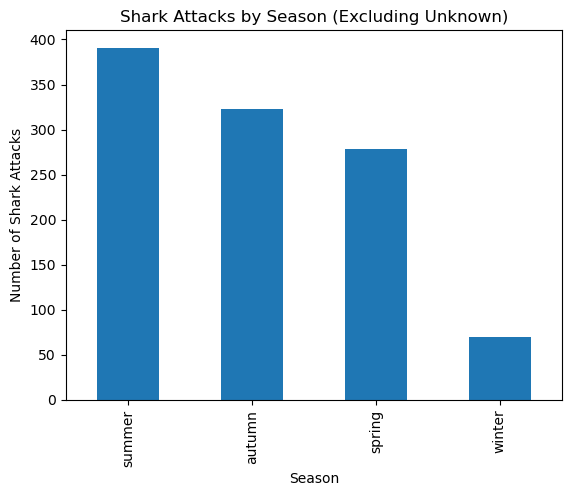

In [24]:
# Count the number of shark attacks in each valid Season category
season_counts = florida_filtered_data["Season"].value_counts()


print(season_counts)


season_counts.plot(kind='bar', title='Shark Attacks by Season (Excluding Unknown)', xlabel='Season', ylabel='Number of Shark Attacks')

In [25]:
florida_filtered_data

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species,Season
24,2023-11-05,2023.0,Unprovoked,USA,Florida,"Juno Beach, Palm Beach County",Swimming,Steven Reinhardt,M,66,Lacerations to right forearm,10h30,NaN,autumn
40,2023-09-12,2023.0,Questionable,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Mark Summersett,M,38,Llacerations to face and chin,07h50,NaN,autumn
41,2023-09-11,2023.0,Unprovoked,USA,Florida,"Satellite Beach, Brevard County",Surfing,Bill Eveland,M,NaN,Bite to lower back,NaN,NaN,autumn
44,2023-09-04,2023.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,male,M,30s,Left hand bitten,NaN,NaN,autumn
45,2023-09-04,2023.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Wading,female,F,37,Right foot bitten,NaN,NaN,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,NaT,0.0,Unprovoked,USA,Florida,"Key West, Monroe County",Kitesurfing,Paul Menta,M,NaN,Hand bitten,NaN,NaN,None
6868,NaT,0.0,Provoked,USA,Florida,"Riviera Beach, Palm Beach County",Skin diving. Grabbed shark's tail; shark turne...,Carl Bruster,M,19,"Ankle punctured & lacerated, hands abraded PRO...",NaN,"Nurse shark, 2.1 m [7']",None
6875,NaT,0.0,Unprovoked,USA,Florida,"Mosquito Inlet (Ponce Inlet), Volusia County",Canoeing,male,M,NaN,FATAL,NaN,NaN,None
6891,NaT,0.0,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,NaN,Abrasions & bruises hip to ankle,NaN,NaN,None


In [26]:
florida_filtered_data["Season"].value_counts().sum()

1061

In [27]:
import re

# Apply the time cleaning function
florida_filtered_data['Cleaned Time'] = florida_filtered_data['Time'].apply(clean_time_format)


florida_filtered_data['Time of Day'] = florida_filtered_data['Cleaned Time'].apply(categorize_cleaned_time)


florida_filtered_data[['Time', 'Cleaned Time', 'Time of Day']].head()


,Time,Cleaned Time,Time of Day
24,10h30,10:30:00,Morning
40,07h50,07:50:00,Morning
41,NaN,None,Unknown
44,NaN,None,Unknown
45,NaN,None,Unknown


In [28]:
florida_filtered_data['Time of Day'].value_counts()

Time of Day
Unknown      485
Afternoon    382
Morning      199
Evening      103
Night         11
Name: count, dtype: int64

In [29]:
# Filter the dataset to exclude rows where 'Time of Day' is 'Unknown'
df_filtered = florida_filtered_data[florida_filtered_data['Time of Day'] != 'Unknown']


print(df_filtered['Time of Day'].value_counts())


Time of Day
Afternoon    382
Morning      199
Evening      103
Night         11
Name: count, dtype: int64


Time of Day
Afternoon    382
Morning      199
Evening      103
Night         11
Name: count, dtype: int64


<Axes: title={'center': 'Shark Attacks by Time of Day (Excluding Unknown)'}, xlabel='Time of Day', ylabel='Number of Shark Attacks'>

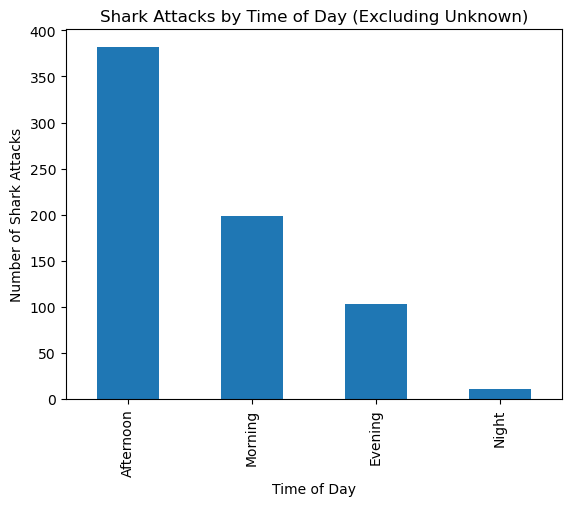

In [30]:
# Count the number of shark attacks in each valid time of day category
time_of_day_counts = df_filtered['Time of Day'].value_counts()


print(time_of_day_counts)


time_of_day_counts.plot(kind='bar', title='Shark Attacks by Time of Day (Excluding Unknown)', xlabel='Time of Day', ylabel='Number of Shark Attacks')


In [31]:
florida_filtered_data["Activity"].value_counts()

# filtering activities into 5 categories which are Surfing, Swimming, Wading, Fishing, Diving

florida_filtered_data["Activity"] = florida_filtered_data["Activity"].replace(r'(?i).*surfing.*', 'Surfing', regex=True)

florida_filtered_data["Activity"] = florida_filtered_data["Activity"].replace(r'(?i).*surf.*', 'Surfing', regex=True)

florida_filtered_data["Activity"] = florida_filtered_data["Activity"].replace(r'(?i).*swimming.*', 'Swimming', regex=True)

florida_filtered_data["Activity"] = florida_filtered_data["Activity"].replace(r'(?i).*fishing.*', 'Fishing', regex=True)

florida_filtered_data["Activity"] = florida_filtered_data["Activity"].replace(r'(?i).*diving.*', 'Diving', regex=True)

florida_filtered_data["Activity"] = florida_filtered_data["Activity"].replace(r'(?i).*snorkel.*', 'Diving', regex=True)

florida_filtered_data["Activity"] = florida_filtered_data["Activity"].replace(r'(?i).*dscuba.*', 'Diving', regex=True)

florida_filtered_data["Activity"] = florida_filtered_data["Activity"].replace(r'(?i).*wading.*', 'Wading', regex=True)

florida_filtered_data["Activity"] = florida_filtered_data["Activity"].replace(r'(?i).*walking.*', 'Wading', regex=True)

florida_filtered_data["Activity"] = florida_filtered_data["Activity"].replace(r'(?i).*standing.*', 'Wading', regex=True)



In [32]:
florida_filtered_data["Activity_new"] = florida_filtered_data.apply(activity_new, axis=1)

florida_filtered_data["Activity_new"].value_counts()

florida_filtered_data.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species,Season,Cleaned Time,Time of Day,Activity_new
24,2023-11-05,2023.0,Unprovoked,USA,Florida,"Juno Beach, Palm Beach County",Swimming,Steven Reinhardt,M,66,Lacerations to right forearm,10h30,NaN,autumn,10:30:00,Morning,Swimming
40,2023-09-12,2023.0,Questionable,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Mark Summersett,M,38,Llacerations to face and chin,07h50,NaN,autumn,07:50:00,Morning,Surfing
41,2023-09-11,2023.0,Unprovoked,USA,Florida,"Satellite Beach, Brevard County",Surfing,Bill Eveland,M,NaN,Bite to lower back,NaN,NaN,autumn,None,Unknown,Surfing
44,2023-09-04,2023.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,male,M,30s,Left hand bitten,NaN,NaN,autumn,None,Unknown,Surfing
45,2023-09-04,2023.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Wading,female,F,37,Right foot bitten,NaN,NaN,autumn,None,Unknown,Wading


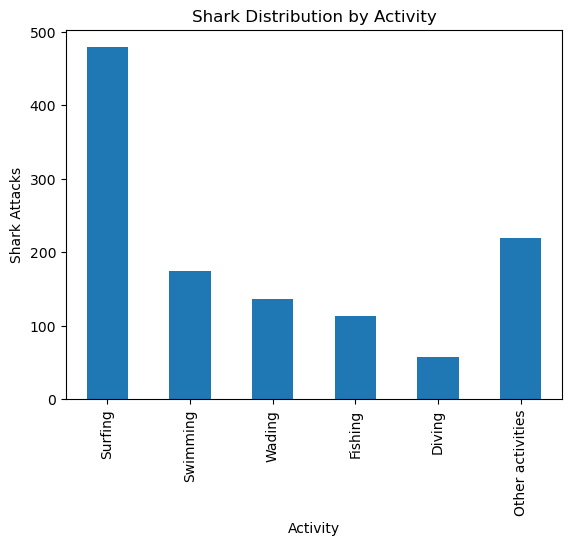

In [33]:
import matplotlib.pyplot as plt

# adding other activities in category "Other activities"

activities_ordered = ["Surfing", "Swimming", "Wading", "Fishing", "Diving", "Other activities"]

florida_filtered_data["Activity_new"] = pd.Categorical(florida_filtered_data["Activity_new"], categories=activities_ordered, ordered=True)


florida_filtered_data["Activity_new"].value_counts().sort_index().plot(kind="bar")
plt.title('Shark Distribution by Activity')
plt.xlabel('Activity')
plt.ylabel('Shark Attacks')
plt.show()

In [34]:
florida_filtered_data["Activity_new"].describe()

count        1180
unique          6
top       Surfing
freq          479
Name: Activity_new, dtype: object

In [35]:
florida_filtered_data["Season"].describe()

count       1061
unique         4
top       summer
freq         391
Name: Season, dtype: object

In [36]:
df_filtered["Time of Day"].describe()

count           695
unique            4
top       Afternoon
freq            382
Name: Time of Day, dtype: object

In [37]:
#crosstable to see if seasons and time of the day have a correlation
contingency_table = pd.crosstab(florida_filtered_data['Season'], df_filtered['Time of Day'])
contingency_table

Time of Day,Afternoon,Evening,Morning,Night
Season,,,,
autumn,112,34,57,1
spring,99,20,65,2
summer,134,41,65,6
winter,26,5,7,1


<Axes: xlabel='Season'>

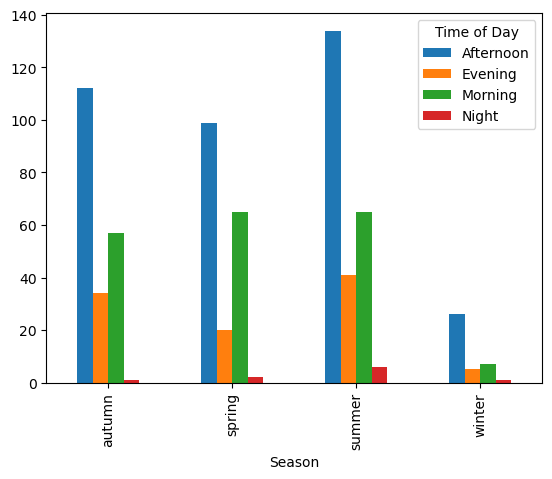

In [38]:
contingency_table.plot(kind="bar")

In [39]:
florida_filtered_data["Injury"]

24                           Lacerations to right forearm
40                          Llacerations to face and chin
41                                     Bite to lower back
44                                       Left hand bitten
45                                      Right foot bitten
                              ...                        
6859                                          Hand bitten
6868    Ankle punctured & lacerated, hands abraded PRO...
6875                                                FATAL
6891                     Abrasions & bruises hip to ankle
6925                                   2-inch lacerations
Name: Injury, Length: 1180, dtype: object

In [40]:
import re

# categorizing injuries into 9 categories

florida_filtered_data['Injury_Cleaned'] = florida_filtered_data['Injury'].apply(clean_injuries)


florida_filtered_data['Injury_Cleaned'].value_counts()


Injury_Cleaned
Laceration           341
Lower Limb Injury    292
Other                226
Upper Limb Injury    118
Minor injury          72
Fatal                 53
No injury             50
Bite                  25
Unknown                3
Name: count, dtype: int64

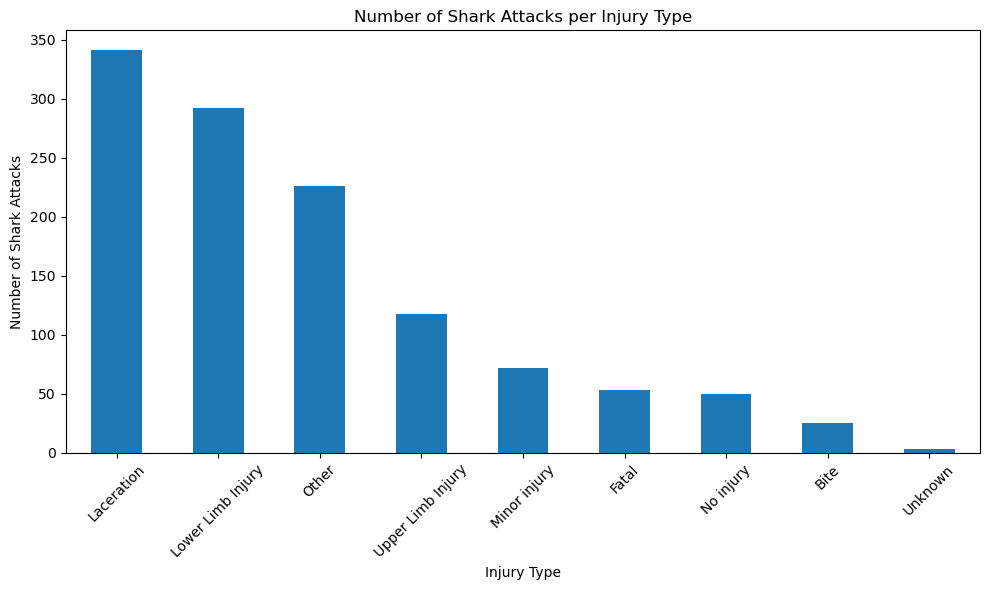

In [41]:
# Apply the function to clean and categorize injuries
florida_filtered_data['Injury_Cleaned'] = florida_filtered_data['Injury'].apply(clean_injuries)

import matplotlib.pyplot as plt


injury_counts = florida_filtered_data['Injury_Cleaned'].value_counts()

# Plotting the number of shark attacks per injury type
plt.figure(figsize=(10, 6))
injury_counts.plot(kind='bar')
plt.title('Number of Shark Attacks per Injury Type')
plt.xlabel('Injury Type')
plt.ylabel('Number of Shark Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
injury_activity_crosstab = pd.crosstab(florida_filtered_data['Injury_Cleaned'], florida_filtered_data['Activity_new'])
injury_activity_crosstab

Activity_new,Surfing,Swimming,Wading,Fishing,Diving,Other activities
Injury_Cleaned,,,,,,
Bite,6,2,5,1,4,7
Fatal,0,17,1,5,6,24
Laceration,169,51,41,20,8,52
Lower Limb Injury,149,33,41,16,9,44
Minor injury,28,9,11,9,3,12
No injury,7,1,3,17,6,16
Other,71,44,28,28,12,43
Unknown,3,0,0,0,0,0
Upper Limb Injury,46,17,7,17,10,21


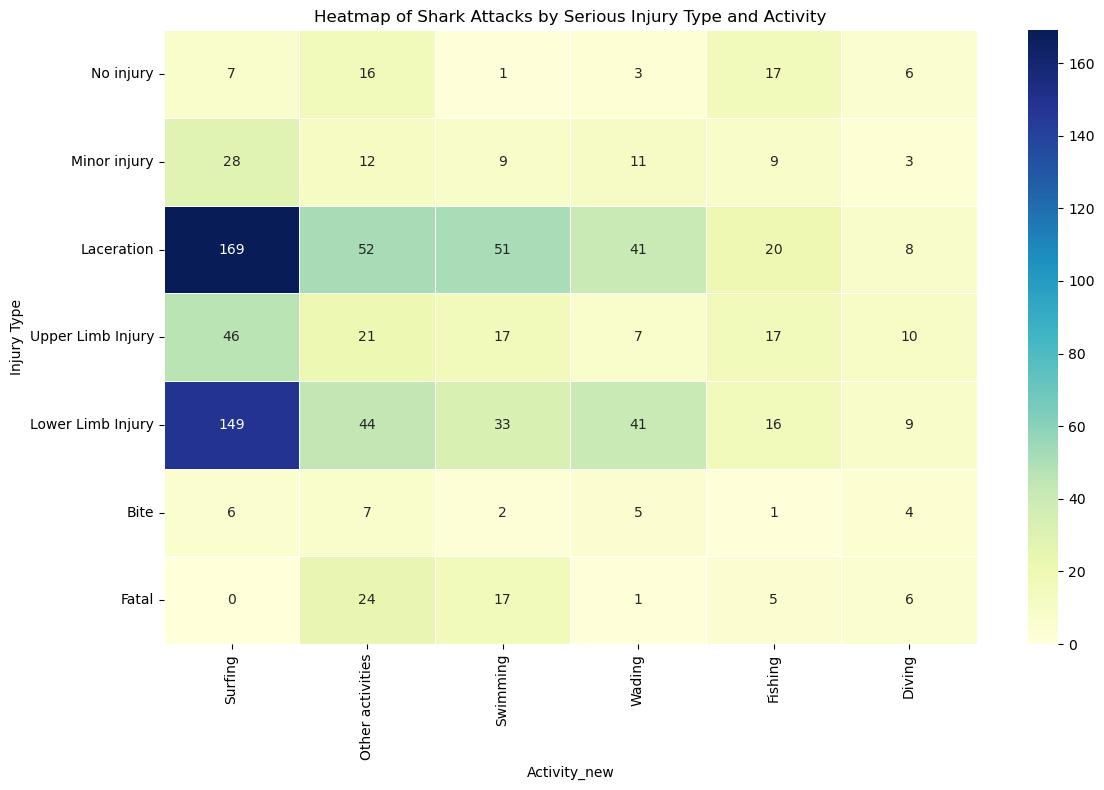

In [43]:
# We will focus only on serious injuries in this specific order
serious_injuries = ['No injury','Minor injury', 'Laceration', 'Upper Limb Injury', 'Lower Limb Injury', 'Bite', 'Fatal']


filtered_crosstab_serious = injury_activity_crosstab.loc[serious_injuries]

# Get the top 10 most common activities to focus the plot
top_activities = florida_filtered_data['Activity_new'].value_counts().head(10).index
filtered_crosstab_serious = filtered_crosstab_serious[top_activities]

import seaborn as sns

# Plot a heatmap for the serious injuries and top activities
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_crosstab_serious, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.title('Heatmap of Shark Attacks by Serious Injury Type and Activity')
plt.xlabel('Activity_new')
plt.ylabel('Injury Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [44]:
# Modify the function to handle non-string entries

florida_filtered_data['Cleaned Location'] = florida_filtered_data['Location'].apply(clean_location)


cleaned_unique_locations = florida_filtered_data['Cleaned Location'].unique()

cleaned_unique_locations


array(['Juno Beach', 'New Smyrna Beach', 'Satellite Beach', 'Ponce Inlet',
       'Anna Maria Island', 'Tampa Bay', 'Cocoa Beach', 'Flamingo Marina',
       'Flagship Drive', 'Marathon', 'Fort Pierce', 'Davis Reef',
       'Virginia Key', 'Boca Raton. Palm Beach County',
       'Blue Fish Channel', 'Jupiter Island', 'Outer Mole',
       '70 miles off Pensacola', 'Hobe Sound', 'Cape San Blas',
       'Key Largo', 'Looe Key', 'Florida Keys', 'Daytona Beach',
       'Cape Canaveral', 'Content Keys', 'Daytona Beach Shores',
       'Keaton Beach', 'Sawyer Key', 'Summerland Key', 'Redington Beach',
       'Whale Harbor', 'Higkand Beach', 'Canaveral National Seashore',
       'Lake Worth Beach', 'Fort Pierce State Park', 'Jensen Beach',
       'Walton Beach Psrk', 'Near Patrick AFB', 'Bathtub Beach',
       '46 miles off Mayport', 'Block Houe Beach', 'Bethune Beach',
       'Grayton Beach State Park', 'Vero Beach', 'Key Biscayne',
       'Indian River County', 'Fort Lauderdale', 'Miami Beach'

In [45]:
florida_filtered_data['Cleaned Location'].nunique()

442

In [46]:
# We will define a list of the largest coasts in Florida based on known major beaches and coastal areas.
largest_coasts = [
    'Miami Beach', 'Daytona Beach', 'Fort Lauderdale', 'Jacksonville Beach',
    'Palm Beach', 'Clearwater Beach', 'Cocoa Beach', 'Pensacola Beach',
    'Siesta Key', 'Key West', 'Naples Beach', 'Fort Myers Beach',
    'New Smyrna Beach', 'Tampa Bay', 'Panama City Beach', 'St. Augustine Beach',
    'Amelia Island', 'Sanibel Island', 'Marco Island', 'Hollywood Beach',
    'Vero Beach', 'Delray Beach', 'Key Biscayne', 'Ponte Vedra Beach',
    'Destin Beach', 'Melbourne Beach', 'Anna Maria Island', 'Venice Beach',
    'Sarasota', 'Hutchinson Island', 'Stuart Beach', 'Flagler Beach',
    'Fernandina Beach', 'Ormond Beach', 'Hobe Sound', 'Jensen Beach',
    'Sebastian Inlet', 'Bathtub Beach', 'Boynton Beach', 'Lantana Beach',
    'Deerfield Beach', 'Lake Worth Beach', 'Lighthouse Point Park',
    'Indian Rocks Beach', 'Johns Pass', 'Indian Harbour Beach',
    'Redington Beach', 'Ponce Inlet', 'Cape Canaveral', 'Hanna Park', 'Haulover Beach'
]


location_attack_counts = florida_filtered_data['Cleaned Location'].value_counts()

# Filter locations that are either in the largest coasts or have more than 5 attacks
florida_filtered_data = florida_filtered_data[
    florida_filtered_data['Cleaned Location'].isin(largest_coasts) |
    florida_filtered_data['Cleaned Location'].isin(location_attack_counts[location_attack_counts > 5].index)
]

sorted(florida_filtered_data['Cleaned Location'].unique())


['Amelia Island',
 'Anna Maria Island',
 'Bathtub Beach',
 'Bethune Beach',
 'Boynton Beach',
 'Cape Canaveral',
 'Clearwater Beach',
 'Cocoa Beach',
 'Crescent Beach',
 'Daytona Beach',
 'Daytona Beach Shores',
 'Deerfield Beach',
 'Delray Beach',
 'Fernandina Beach',
 'Flagler Beach',
 'Florida Keys',
 'Fort Lauderdale',
 'Fort Myers Beach',
 'Fort Pierce',
 'Hanna Park',
 'Haulover Beach',
 'Hobe Sound',
 'Hollywood Beach',
 'Hutchinson Island',
 'Indian Rocks Beach',
 'Jacksonville',
 'Jacksonville Beach',
 'Jensen Beach',
 'Juno Beach',
 'Jupiter',
 'Key Biscayne',
 'Key West',
 'Lake Worth Beach',
 'Lantana Beach',
 'Marathon',
 'Marco Island',
 'Melbourne Beach',
 'Miami Beach',
 'New Smyrna Beach',
 'Ormond Beach',
 'Palm Beach',
 'Panama City',
 'Pensacola Bay',
 'Playalinda Beach',
 'Ponce Inlet',
 'Ponte Vedra Beach',
 'Redington Beach',
 'Riviera Beach',
 'Sanibel Island',
 'Sarasota',
 'Sebastian Inlet',
 'Siesta Key',
 'Singer Island',
 'St. Augustine',
 'St. Augustine Be

In [47]:
top_20_locations = florida_filtered_data['Cleaned Location'].value_counts().head(20)

top_20_locations

Cleaned Location
New Smyrna Beach        202
Ponce Inlet              41
Daytona Beach            34
Cocoa Beach              32
Melbourne Beach          21
Florida Keys             20
Jensen Beach             14
Singer Island            13
Jacksonville Beach       13
Juno Beach               12
Ormond Beach             12
Palm Beach               11
Vero Beach               11
Playalinda Beach         11
Daytona Beach Shores     11
Riviera Beach            10
Fort Lauderdale          10
Fort Pierce               9
Bethune Beach             9
Marathon                  8
Name: count, dtype: int64

In [48]:
import pandas as pd
import scipy.stats as stats
import numpy as np

from codebook_florida import chi2_cramers_v

# List of categorical variables
categorical_columns = ['Cleaned Location', 'Activity_new', 'Season', 'Time of Day']

# Create a DataFrame to store the results
correlation_results = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'P-Value', "Cramér's V"])

# Loop through each pair of variables
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        col1, col2 = categorical_columns[i], categorical_columns[j]
        p_val, cramers_v = chi2_cramers_v(florida_filtered_data, col1, col2)

        # Create a temporary DataFrame for the result and concatenate it with the main results DataFrame
        temp_df = pd.DataFrame({
            'Variable 1': [col1],
            'Variable 2': [col2],
            'P-Value': [p_val],
            "Cramér's V": [cramers_v]
        })
        correlation_results = pd.concat([correlation_results, temp_df], ignore_index=True)

# Display the correlation results
print(correlation_results)


         Variable 1    Variable 2       P-Value  Cramér's V
0  Cleaned Location  Activity_new  1.471886e-32    0.449643
1  Cleaned Location        Season  8.420079e-04    0.358349
2  Cleaned Location   Time of Day  2.418199e-12    0.393446
3      Activity_new        Season  3.328946e-05    0.161923
4      Activity_new   Time of Day  2.214992e-09    0.175793
5            Season   Time of Day  4.778110e-01    0.080232


In [49]:
pip install geopy folium


Note: you may need to restart the kernel to use updated packages.


In [50]:
import folium

In [51]:
from geopy.geocoders import Nominatim

In [52]:
import pandas as pd

In [53]:
#Initialize the geocoder
geolocator = Nominatim(user_agent="shark_attack_map")

# Get the top 20 locations
top_20_locations = florida_filtered_data['Cleaned Location'].value_counts().head(20).index

# Create a list to store geocoded locations
geo_locations = []

# Loop through the top 20 locations and get their latitude and longitude
for location in top_20_locations:
    try:
        # Geocode the location
        loc = geolocator.geocode(location)
        if loc:
            geo_locations.append({
                'location': location,
                'latitude': loc.latitude,
                'longitude': loc.longitude
            })
    except:
        print(f"Could not geocode {location}")

# Convert the geocoded data into a DataFrame
geo_df = pd.DataFrame(geo_locations)

# Initialize a folium map centered at a default location (e.g., Florida)
shark_map = folium.Map(location=[27.9944024, -81.7602544], zoom_start=6)  # Coordinates for Florida

# Add markers to the map for each geocoded location
for i, row in geo_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['location'],
    ).add_to(shark_map)

# Display the map
shark_map